<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt

14


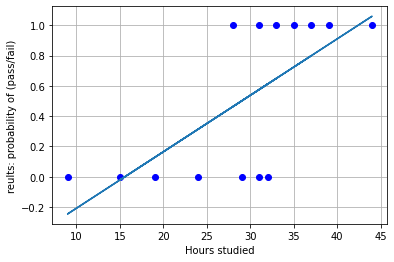

In [27]:
x = np.array([29, 15, 33, 28, 39, 44, 31, 19, 9, 24, 32, 31, 37, 35])
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])
print(len(x))

plt.plot(x, y, 'bo')
plt.xlabel('Hours studied')
plt.ylabel('reults: probability of (pass/fail)')
plt.grid()


# it is impossible to find a linear regression model that can fit this data
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.show()

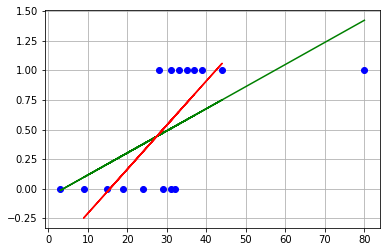

In [34]:
# add an outlier 
x1 = np.append(x, [3, 80])
y1 = np.append(y, [0, 1])

m1, b1 = np.polyfit(x1, y1, 1)

def lin_reg(x, m, b):
  return(m*x+b)

plt.figure()
plt.plot(x1, y1, 'bo')
plt.plot(x1, lin_reg(x1, m1, b1), 'g-')
plt.plot(x, lin_reg(x, m, b), 'r-')
plt.grid()
plt.show()

[[0.39661199]]
[-12.05411972]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


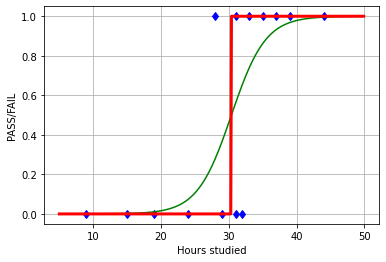

In [35]:
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model
log_reg = LogisticRegression()

# fit the model with data
log_reg.fit(x.reshape(-1,1),y.reshape(-1,1))   #.reshape(-1,1)

print(log_reg.coef_)
print(log_reg.intercept_)

xx = np.arange(5, 50,0.1).reshape(-1,1)
y_pred = log_reg.predict(xx)

def sig(x):
  return(np.exp(x)/(1+np.exp(x)))

net = log_reg.intercept_ + log_reg.coef_ * xx

plt.plot(x,y,'bd')
plt.plot(xx, sig(net), 'g-')
plt.plot(xx,y_pred,'r-',LineWidth=3.0)
plt.xlabel('Hours studied')
plt.ylabel('PASS/FAIL')
plt.grid()
plt.show()